In [20]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt

In [19]:
truth = open("../truth.txt",'r').read().splitlines()
truth = [0 if x == "Sith" else 1 for x in truth]

In [18]:
predictions = open("../predictions.txt",'r').read().splitlines()
predictions = [0 if x == "Sith" else 1 for x in predictions]

In [4]:
confusion_matrix = metrics.confusion_matrix(truth, predictions)
confusion_matrix

array([[21, 30],
       [24, 25]])

In [17]:
conf_matrix = np.zeros((2, 2))
for a, p in zip(truth, predictions):
    conf_matrix[a][p] += 1

precision_jedi = (conf_matrix[1][1]) / (conf_matrix[1][1] + conf_matrix[0][1])
precision_sith = (conf_matrix[0][0]) / (conf_matrix[0][0] + conf_matrix[1][0])
recall_jedi = conf_matrix[1][1] / (conf_matrix[1][1] + conf_matrix[1][0])
recall_sith = conf_matrix[0][0] / (conf_matrix[0][0] + conf_matrix[0][1])
f1score_jedi = 2 * (precision_jedi * recall_jedi) / (precision_jedi + recall_jedi)
f1score_sith = 2 * (precision_sith * recall_sith) / (precision_sith + recall_sith)

df = pd.DataFrame({
    "precision": [precision_jedi, precision_sith],
    "recall": [recall_jedi, recall_sith],
    "f1-score": [f1score_jedi, f1score_sith],
    "total": [truth.count(1), truth.count(0)]
}, index=['Jedi', 'Sith'])

df.loc['accuracy'] = ['', '', df['f1-score'].mean(), df['total'].sum()]
df.round(2)

,precision,recall,f1-score,total
Jedi,0.454545,0.510204,0.48,49
Sith,0.466667,0.411765,0.44,51
accuracy,,,0.46,100


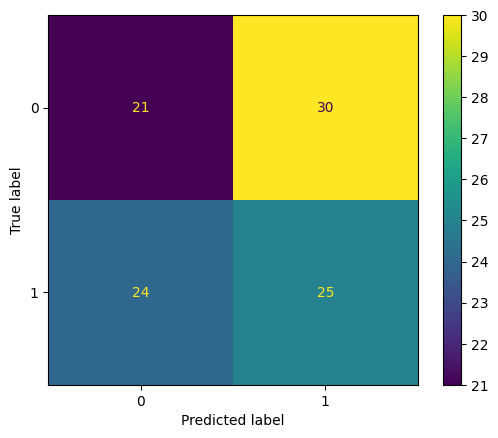

In [23]:
cm_display = metrics.ConfusionMatrixDisplay(conf_matrix)

cm_display.plot()
plt.show() 